# Curso Mare montagem de genomas

## Montando o driver (opcional)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Definindo diretório de trabalho

In [16]:
path = "/content/drive/MyDrive/Curso-mare"

### Instalando `conda`

In [6]:
!pip install -q condacolab

In [ ]:
import condacolab
condacolab.install()

## Instalando o `spades` e o `bwa`

In [ ]:
!conda install -c bioconda spades --quiet

## Montando um genoma _de novo_ usando o `spades`

In [ ]:
!mkdir $path/spades

In [ ]:
!spades.py -1 /content/drive/MyDrive/Curso-mare/cutadapt/SRR519926_1.fastq.gz -2 /content/drive/MyDrive/Curso-mare/cutadapt/SRR519926_2.fastq.gz -o $path/spades


## Avaliando a qualidade da montagem

Instalando o quast

In [ ]:
!conda install -c bioconda quast --quiet

Criando o diretório para saída dos dados

In [ ]:
!mkdir $path/quast

Analisando os dados

In [ ]:
!quast -o $path/quast $path/spades/contigs.fasta

## Montagem por referência

### Configurando o genomas de referência, download, index, dict, etc.

Para realizar a montagem do genoma por referência, devemos inicialmente obter e indexar a referência, para isso iremos até o NCBI e buscaremos em genomes o nome do organismo. _Escherichia coli_


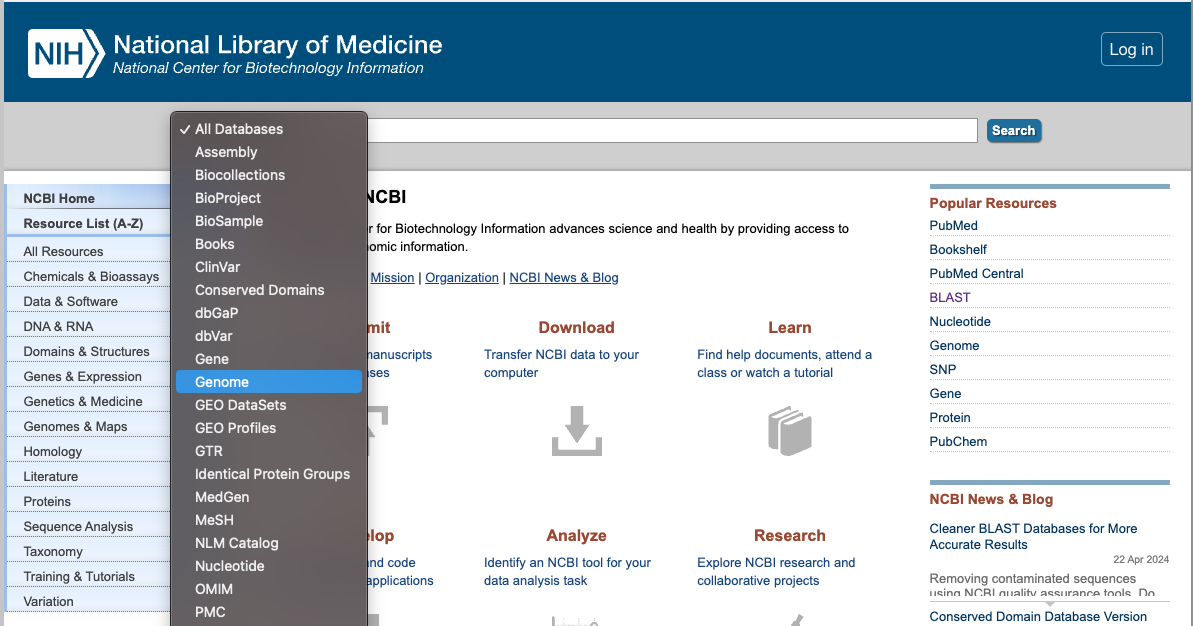

Configurando o ambiente

In [ ]:
!conda install -c bioconda picard samtools gatk4 bwa freebayes --quiet

In [17]:
!mkdir $path/reference

Baixando o genoma de referência

In [ ]:
!wget ftp://ftp.ncbi.nlm.nih.gov/genomes/all/GCF/000/005/845/GCF_000005845.2_ASM584v2/GCF_000005845.2_ASM584v2_genomic.fna.gz -P $path/reference

In [19]:
!gzip -d $path/reference/GCF_000005845.2_ASM584v2_genomic.fna.gz

Indexando o genoma de referência

In [ ]:
!bwa index $path/reference/GCF_000005845.2_ASM584v2_genomic.fna

In [21]:
!samtools faidx $path/reference/GCF_000005845.2_ASM584v2_genomic.fna

In [ ]:
!picard CreateSequenceDictionary R=$path/reference/GCF_000005845.2_ASM584v2_genomic.fna O=$path/reference/GCF_000005845.2_ASM584v2_genomic.dict

### Mapeando os reads no genoma de referência

In [ ]:
!bwa mem -R "@RG\tID:SRR519926\tSM:SRR519926\tPL:MARE\tPU:unit1\tLB:lib1" $path/reference/GCF_000005845.2_ASM584v2_genomic.fna /content/drive/MyDrive/Curso-mare/cutadapt/SRR519926_1.fastq.gz /content/drive/MyDrive/Curso-mare/cutadapt/SRR519926_2.fastq.gz > $path/reference/SRR519926.sam


In [33]:
!samtools sort $path/reference/SRR519926.sam > $path/reference/SRR519926.bam

In [34]:
!samtools index $path/reference/SRR519926.bam

In [ ]:
!samtools view $path/reference/SRR519926.bam | wc -l

In [ ]:
!gatk --java-options "-Xmx10g" HaplotypeCaller -R /content/drive/MyDrive/Curso-mare/reference/GCF_000005845.2_ASM584v2_genomic.fna -I /content/drive/MyDrive/Curso-mare/reference/SRR519926.bam -O /content/drive/MyDrive/Curso-mare/reference/SRR519926.vcf --sample-ploidy 1

In [ ]:
!freebayes -f /content/drive/MyDrive/Curso-mare/reference/GCF_000005845.2_ASM584v2_genomic.fna /content/drive/MyDrive/Curso-mare/reference/SRR519926.bam > /content/drive/MyDrive/Curso-mare/reference/SRR519926.freebayes.bam

Checando as variantes encontradas

In [ ]:
!grep -v "##" /content/drive/MyDrive/Curso-mare/reference/SRR519926.vcf | head -n 10